In [14]:
import pandas as pd
import matplotlib.pyplot as plt




books = pd.read_csv('2024BookList.csv')
print(books.head())

                                               Title  \
0                                  The Little Prince   
1                                           Atalanta   
2                                   Ariadne: A Novel   
3  Building Java Programs: A Back to Basics Appro...   
4                                  The Last Olympian   

                       Author         Download_Timestamp  MonthRead  \
0    Antoine de Saint-Exupery  2023-09-22 16:22:03-08:00          1   
1              Jennifer Saint  2024-02-22 07:00:05-08:00          1   
2              Jennifer Saint  2023-12-28 18:38:12-08:00          1   
3  Stuart Reges & Marty Stepp         2024-03-01 0:00:00          1   
4                Rick Riordan  2023-09-22 15:50:23-08:00          1   

       Format  Completed           ISBN  \
0  epub, mobi          1  9780156012195   
1  epub, mobi          1  9781250855572   
2        mobi          1  9781250773579   
3  epub, mobi          0  9780135471944   
4  epub, mobi        

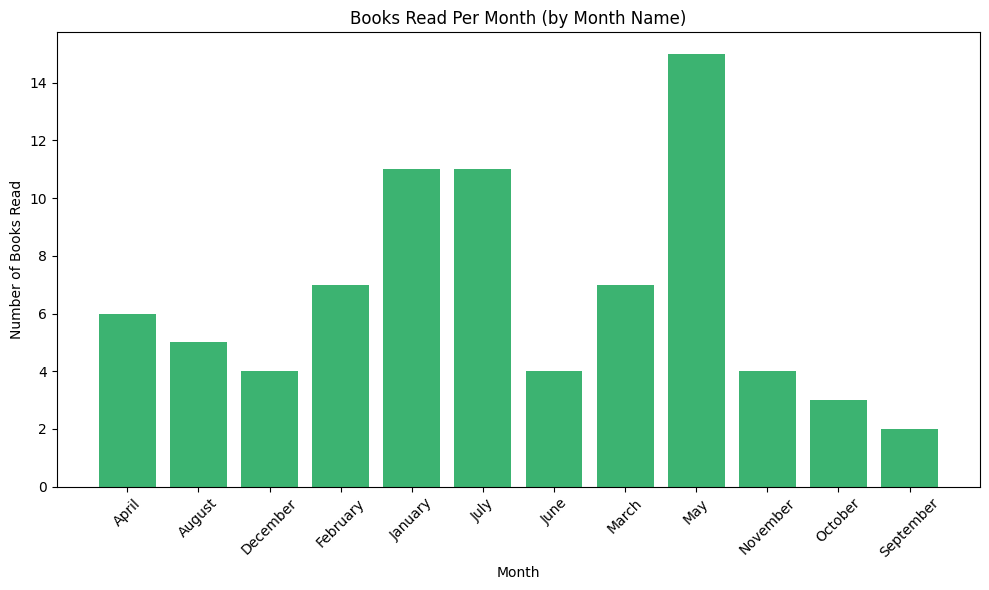

In [15]:
# Count books read per month by MonthName
month_counts = books['MonthName'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(month_counts.index, month_counts.values, color='mediumseagreen')
plt.title('Books Read Per Month (by Month Name)')
plt.xlabel('Month')
plt.ylabel('Number of Books Read')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                       Author  Title Count
46                               Rick Riordan            7
2                                Alice Oseman            6
43                                R. F. Kuang            4
26                            Jesse Armstrong            4
50                                Stephen Fry            3
8                              Becky Chambers            3
25                             Jennifer Saint            2
31                            Madeline Miller            2
51                 Stuart Reges & Marty Stepp            1
49                        Selby Wynn Schwartz            1
32                                  Matt Haig            1
33                           Mia P. Manansala            1
54                               Walter Tevis            1
53                        Taylor Jenkins Reid            1
34                            Michelle Zauner            1
35                             Michiko Aoyama           

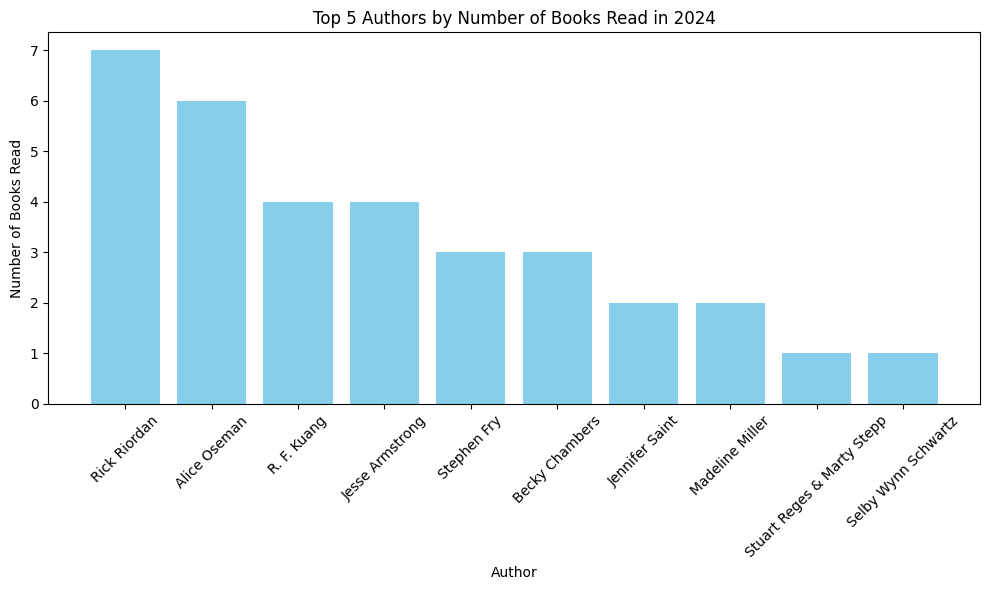

In [16]:
# Count how many books by each author were read this year
author_counts = books.groupby('Author')['Title'].count().reset_index()
author_counts.columns = ['Author', 'Title Count']
print(author_counts.sort_values(by='Title Count', ascending=False))

#Create and show a chart of the top 5 authors by number of books read
import matplotlib.pyplot as plt
top_authors = author_counts.sort_values(by='Title Count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_authors['Author'], top_authors['Title Count'], color='skyblue')
plt.title('Top 5 Authors by Number of Books Read in 2024')
plt.xlabel('Author')
plt.ylabel('Number of Books Read')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [19]:
books['Download_Timestamp'] = pd.to_datetime(books['Download_Timestamp'], format='mixed', errors='coerce')

# Make all timestamps naive (remove timezone info) and drop rows with NaT
books['Download_Timestamp'] = books['Download_Timestamp'].dt.tz_localize(None)
books_with_timestamp = books.dropna(subset=['Download_Timestamp'])

# Sort books by the timestamp
sorted_books = books_with_timestamp.sort_values(by='Download_Timestamp')

# Check and print the first and last entries
if not sorted_books.empty:
    first_book = sorted_books.iloc[0]
    last_book = sorted_books.iloc[-1]

    print(f"The first book read was '{first_book['Title']}' by {first_book['Author']}, on {first_book['Download_Timestamp'].date()}.")
    print(f"The last?? (but let's be real, this is probably wrong) book read was '{last_book['Title']}' by {last_book['Author']}, on {last_book['Download_Timestamp'].date()}.")
else:
    print("No books with a valid Download_Timestamp found.")

The first book read was 'The Little Prince' by Antoine de Saint-Exupery, on 2023-09-22.
The last?? (but let's be real, this is probably wrong) book read was 'Atalanta' by Jennifer Saint, on 2024-02-22.


In [20]:
#Series Stats

series = books.groupby('Series')['Title'].count().reset_index()
series.columns = ['Series', 'Number of Books']

# Filter bc series with only 1 book shouldnt count as a series
series_counts = series[series['Number of Books'] > 1]
# unique_series_count = series_counts['Series'].nunique()

print(f"The number of different series read is: {series_counts}")
print(series_counts.sort_values(by='Number of Books', ascending=False))
seriesWithMostBooks = series_counts.sort_values(by='Number of Books', ascending=False).head(1)
seriesWithLeastBooks = series_counts.sort_values(by='Number of Books', ascending=True).head(1)
print(f"The series with the least books read is: {seriesWithLeastBooks['Series'].values[0]} with {seriesWithLeastBooks['Number of Books'].values[0]} books.")
print(f"The series with the most books read is: {seriesWithMostBooks['Series'].values[0]} with {seriesWithMostBooks['Number of Books'].values[0]} books.")



The number of different series read is:                               Series  Number of Books
2                       Heartstopper                5
8                       Monk & Robot                2
12   Percy Jackson and the Olympians                6
14  Stephen Fry's Greek Myths Series                3
15                        Succession                4
16                     The Poppy War                3
                              Series  Number of Books
12   Percy Jackson and the Olympians                6
2                       Heartstopper                5
15                        Succession                4
14  Stephen Fry's Greek Myths Series                3
16                     The Poppy War                3
8                       Monk & Robot                2
The series with the least books read is: Monk & Robot with 2 books.
The series with the most books read is: Percy Jackson and the Olympians with 6 books.


In [21]:
#fucking around with the book dimensions

total_thickness_in = (books['Thickness'].sum())
total_thickness_ft = total_thickness_in / 12
print(f"The total thickness of all books is: {total_thickness_in:.2f} inches or {total_thickness_ft:.1f} feet.")

total_width_in = (books['Width'].sum())
total_width_ft = total_width_in / 12
print(f"The total width of all books is: {total_width_in:.2f} inches or {total_width_ft:.1f} feet.")

total_height_in = (books['Height'].sum())
total_height_ft = total_height_in / 12
print(f"The total height of all books is: {total_height_in:.2f} inches or {total_height_ft:.1f} feet.")


The total thickness of all books is: 116.69 inches or 9.7 feet.
The total width of all books is: 463.85 inches or 38.7 feet.
The total height of all books is: 673.67 inches or 56.1 feet.


In [22]:
# Calculate the total height of all books pages lined up
total_page_count = books['Pages'].sum()
print(f"The total page count of all books is: {total_page_count}")
# Calculate the height of the stacked pages (Height x Page Count for each book)
books['Total Height'] = books['Height'] * books['Pages']

# Sum up the total height across all books
total_height = books['Total Height'].sum()

# Display the total height in inches and feet
total_height_inches = total_height
total_height_ft = total_height_inches / 12
total_height_miles = total_height_ft / 5280
total_height_space_needles = total_height_ft / 605
total_height_10k = total_height_miles / 6.21
print(f"The total length of all pages is:  {total_height_ft:.1f} feet or {total_height_miles:.1f} miles or {total_height_space_needles:.1f} Space Needles or {total_height_10k:.1f} 10k marathons")


The total page count of all books is: 34978
The total length of all pages is:  25740.4 feet or 4.9 miles or 42.5 Space Needles or 0.8 10k marathons


In [23]:
# Thickest books by page count
top_page_count = books.sort_values(by='Pages', ascending=False).head(10)

#thickest book where Completed == 1
longestBookRead = books[books['Completed'] == 1].sort_values(by='Pages', ascending=False).head(10)
shortestBookRead = books[books['Completed'] == 1].sort_values(by='Pages', ascending=True).head(10)

# Display the top 10 books with the highest page count
print(longestBookRead[['Title', 'Author', 'Pages']])
print(shortestBookRead[['Title', 'Author', 'Pages']])



                                  Title  \
65              Complete Works of Plato   
51               A Little Life: A Novel   
40                        Metamorphoses   
58                  The Dragon Republic   
28                 The Will of the Many   
59                      The Burning God   
42                   The Iliad of Homer   
56                Clytemnestra: A Novel   
50                   The Secret History   
60  Babel: Or the Necessity of Violence   

                                       Author  Pages  
65  Plato & John M. Cooper & D. S. Hutchinson   1848  
51                           Hanya Yanagihara    832  
40                                       Ovid    768  
58                                R. F. Kuang    672  
28                            James Islington    640  
59                                R. F. Kuang    640  
42                 Richmond Lattimore & Homer    608  
56                            Costanza Casati    582  
50                             

In [24]:
#Genre Count
from collections import Counter
import matplotlib.pyplot as plt

all_genres = books['Categories'].dropna().str.split(',').sum()
genre_counts = Counter([genre.strip() for genre in all_genres])
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
# print(genre_counts_df)

# plt.figure(figsize=(12, 8))
# plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
# plt.title('Count of Books by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

#Pie Chart

# Exclude 'Fiction' and 'YA' and filter genres with more than 3 occurrences bc it was wonky
filtered_genre_counts = {genre: count for genre, count in genre_counts.items() if genre not in ['Fiction', 'YA'] and count >= 3}
filtered_genre_table = pd.DataFrame(list(filtered_genre_counts.items()), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Display the table
print("Filtered Genre Breakdown Table (Excluding 'Fiction' and >= 3 Occurrences):")
display(filtered_genre_table)

# Prepare data for the pie chart
# labels = list(filtered_genre_counts.keys())
# sizes = list(filtered_genre_counts.values())

# # Plot the pie chart
# plt.figure(figsize=(10, 8))
# plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140)
# plt.title("Filtered Genre Breakdown (Excluding 'Fiction')")
# plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
# plt.show()

Filtered Genre Breakdown Table (Excluding 'Fiction' and >= 3 Occurrences):


,Genre,Count
1,Greek Mythology,25
4,Queer,9
0,Classics,8
10,Memoir,6
6,Script,5
2,Technology,4
3,Textbook,4
5,Graphic Novel,4
7,Short Story,4
9,Autobiography,4


In [25]:
#Total Money Spent
# Calculate the total amount spent on all books
total_spent = books['USD Sale Price'].sum()
mostExpensiveBook = books.loc[books['USD Sale Price'].idxmax()]
leastExpensiveBook = books.loc[books['USD Sale Price'].idxmin()]
print(f"The most expensive book was '{mostExpensiveBook['Title']}' by {mostExpensiveBook['Author']} at ${mostExpensiveBook['USD Sale Price']:.2f}.")
print(f"The cheapest book was '{leastExpensiveBook['Title']}' by {leastExpensiveBook['Author']} at ${leastExpensiveBook['USD Sale Price']:.2f}.")
print(f"The total amount spent on all books is: ${total_spent:.2f}")
print(f"The average amount spent on each book is: ${total_spent / len(books):.2f}")
print("but you used Libby for most of them so you didn't actually spend that much")


The most expensive book was 'Building Java Programs: A Back to Basics Approach / Edition 5' by Stuart Reges & Marty Stepp at $205.89.
The cheapest book was 'The Secret History' by Donna Tartt at $0.00.
The total amount spent on all books is: $1215.78
The average amount spent on each book is: $15.39
but you used Libby for most of them so you didn't actually spend that much


In [31]:
#WIP to export the data to a JSON file for React

import json
import os
import numpy as np

# Helper function to convert non-serializable types
def safe_json(obj):
    if isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, (np.ndarray,)):
        return obj.tolist()
    elif pd.isna(obj):
        return None
    else:
        return str(obj)

wrapped_data = {
    "booksPerMonth": month_counts.to_dict(),
    "topAuthors": top_authors.to_dict(orient="records"),
    "firstBook": {
        "title": first_book['Title'],
        "author": first_book['Author'],
        "timestamp": first_book['Download_Timestamp'].isoformat()
    },
    "lastBook": {
        "title": last_book['Title'],
        "author": last_book['Author'],
        "timestamp": last_book['Download_Timestamp'].isoformat()
    },
    "seriesWithMostBooks": {
        "series": seriesWithMostBooks['Series'].values[0],
        "count": seriesWithMostBooks['Number of Books'].values[0]
    },
    "seriesWithLeastBooks": {
        "series": seriesWithLeastBooks['Series'].values[0],
        "count": seriesWithLeastBooks['Number of Books'].values[0]
    },
    "totalThicknessIn": total_thickness_in,
    "totalThicknessFt": total_thickness_ft,
    "totalWidthIn": total_width_in,
    "totalWidthFt": total_width_ft,
    "totalHeightIn": total_height_in,
    "totalHeightFt": total_height_ft,
    "totalHeightMiles": total_height_miles,
    "totalHeightSpaceNeedles": total_height_space_needles,
    "totalHeight10k": total_height_10k,
    "longestBookRead": longestBookRead[['Title', 'Author', 'Pages']].to_dict(orient="records"),
    "shortestBookRead": shortestBookRead[['Title', 'Author', 'Pages']].to_dict(orient="records"),
    "genreCounts": genre_counts_df.to_dict(orient="records"),
    "totalSpent": total_spent,
    "mostExpensiveBook": {
        "title": mostExpensiveBook['Title'],
        "author": mostExpensiveBook['Author'],
        "price": mostExpensiveBook['USD Sale Price']
    },
    "leastExpensiveBook": {
        "title": leastExpensiveBook['Title'],
        "author": leastExpensiveBook['Author'],
        "price": leastExpensiveBook['USD Sale Price']
    },
    "averageSpentPerBook": total_spent / len(books),
    "totalBooks": len(books),
    "totalAuthors": books['Author'].nunique(),
    "totalSeries": series_counts['Series'].nunique() if isinstance(series_counts, pd.DataFrame) else int(series_counts),
    "totalGenres": len(genre_counts),
    "totalBooksRead": books['Completed'].sum(),
    "totalBooksNotRead": len(books) - books['Completed'].sum()
}

# Clean data for JSON
wrapped_data_clean = json.loads(json.dumps(wrapped_data, default=safe_json))

# Export to JSON
with open("2024-book-wrapped/public/wrapped_metrics.json", "w") as f:
    json.dump(wrapped_data_clean, f, indent=2)

